In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.patches import ConnectionStyle

%matplotlib inline


In [2]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'data_set_citations.json'

In [3]:
df = pd.read_json(dirname+filename)
df['data_set_id'] = ['data_'+str(i) for i in df['data_set_id']]
df['publication_id'] = ['pub_'+str(i) for i in df['publication_id']]
df = df.drop('mention_list', axis=1)
df.head()

,data_set_id,publication_id,score
0,data_305,pub_103,0.264053
1,data_306,pub_103,0.429020
2,data_320,pub_103,0.374938
3,data_306,pub_104,0.293487
4,data_306,pub_106,0.343932


In [4]:
G = nx.Graph()
G.add_weighted_edges_from(df.values.tolist(),color='black')

In [5]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'research_fields.json'

In [6]:
df_rf = pd.read_json(dirname+filename)
# df_rf['data_set_id'] = ['data_'+str(i) for i in df_rf['data_set_id']]
df_rf['publication_id'] = ['pub_'+str(i) for i in df_rf['publication_id']]
# df_rf = df_rf.drop('mention_list', axis=1)
G.add_weighted_edges_from(df_rf.values.tolist(),color='blue')
# df_rf.head(5)

df_visual = df.sample(frac=0.05, replace=True, random_state=1)
df_rf_visual = pd.merge(df_rf,df_visual , on='publication_id', how='inner')[['publication_id','research_field','score_x']]
pos = nx.spring_layout(G)

,publication_id,research_field,score
0,pub_102,business:finance,0.96
1,pub_103,economics:finance,0.82
2,pub_104,economics:finance,0.97
3,pub_106,economics:finance,0.97
4,pub_107,business:finance,0.91


In [ ]:
dataset_nodes = set(df_visual.data_set_id)
pub_nodes = set(df_visual.publication_id)
rf_nodes = set(df_rf_visual.research_field)

dataset_nodes_list = list(dataset_nodes)
pub_nodes_list = list(pub_nodes)
rf_nodes_list = list(rf_nodes)

multiassign_x_y(pos,dataset_nodes_list,[0.2]*len(dataset_nodes_list))
multiassign_x_y(pos,pub_nodes_list,[0.5]*len(pub_nodes_list))
multiassign_x_y(pos,rf_nodes_list,[0.8]*len(rf_nodes_list))

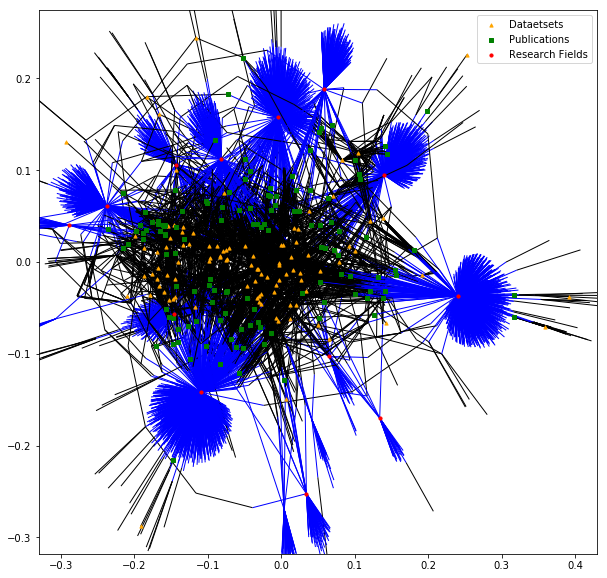

In [7]:
from matplotlib.patches import ConnectionStyle
plt.figure(figsize=(10,10))

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = rf_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Research Fields')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos,edge_color=colors)


plt.legend()

In [8]:
alldatasets = [i for i in G.nodes if(i.startswith('data'))]

In [9]:
def generatePairs(firstnode):
    return [(firstnode, i) for i in allnodes]

In [10]:
# G.nodes ### data_305, data_306
### data_320
pairs = generatePairs('data_320')
preds_jaccard = nx.jaccard_coefficient(G, pairs)
preds_adar = nx.adamic_adar_index(G, pairs)
preds_clust = nx.within_inter_cluster(G, pairs)

In [11]:
for u, v, p, in preds_jaccard:
    print('(%s, %s) -> %.8f' % (u, v, p))
    break

(data_320, data_592) -> 0.00000000


In [26]:
[i for i in G.nodes if (not i.startswith('data_')) & (not i.startswith('pub_'))]

['business:healthcare',
 'economics:healthcare',
 'economics:welfare',
 'economics:finance',
 'business:finance',
 'sociology:criminology',
 'sociology:welfare',
 'sociology:education',
 'economics',
 'economics:criminology',
 'economics:education',
 'business:education',
 'sociology:finance',
 'economics:agriculture',
 'sociology:healthcare',
 'medicine:criminology',
 'medicine:education',
 'business',
 'business:criminology',
 'medicine:finance',
 'medicine:healthcare',
 'sociology:agriculture',
 'sociology',
 'business:welfare']

In [51]:
def zoomGraph(nodeList, G):
    tmp = [list(G.neighbors(i)) for i in nodeList]
    allneighbors = []
    [allneighbors.extend(i) for i in tmp]
    allneighbors = [i for i in allneighbors if i in G.nodes]
    
    allpubs = [i for i in allneighbors if i.startswith('pub_')]
    tmp = [list(G.neighbors(i)) for i in allpubs]
    allrf = []
    [allrf.extend(i) for i in tmp]
    allrf = [i for i in allrf if (not i.startswith('pub_')) & (not i.startswith('data_'))]
#     print(allrf)
    
    allnodes = allneighbors
    print(len(allnodes))
    allnodes.extend(nodeList)
    print(len(allnodes))
#     allnodes.extend(allrf)
#     print(len(allnodes))
    alledges = [i for i in G.edges(allnodes)]
    
    return allnodes, alledges, allrf

In [52]:
zoomNode = ['data_320', 'data_305', 'data_306',
            'data_1283', 'data_1286', 'data_312']
allnodes, alledges, allrf = zoomGraph(zoomNode, G)
print(len(allnodes))
print(len(alledges))

92
98
98
335


In [14]:
def multiassign_x_y(d, keys, values):
    for k, v in zip(keys, values):
        d[k][0] = v 
        d[k][1] = d[k][1]*10

In [53]:
# pos = nx.spring_layout(G)

dataset_nodes = set([i for i in allnodes if i.startswith('data_')])
pub_nodes = set([i for i in allnodes if i.startswith('pub_')])
rf_nodes = set(allrf)

multiassign_x_y(pos,list(dataset_nodes),[0.2]*len(dataset_nodes))
multiassign_x_y(pos,list(pub_nodes),[0.5]*len(pub_nodes))
multiassign_x_y(pos,list(rf_nodes),[0.8]*len(rf_nodes))

In [54]:
rf_nodes

{'business:finance', 'economics:finance', 'sociology:finance'}

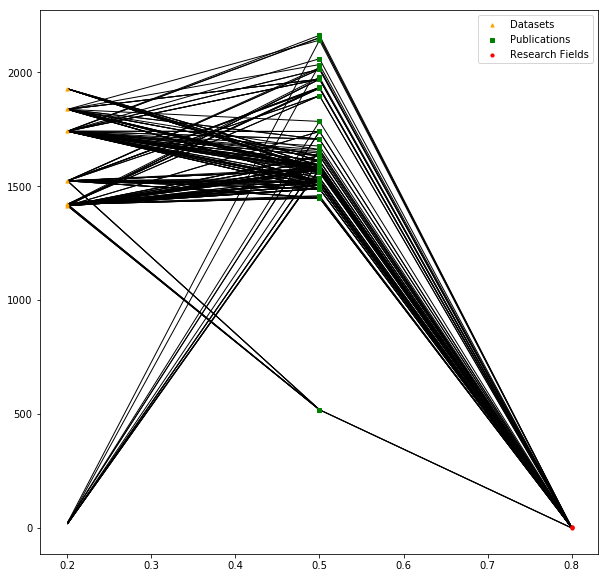

In [57]:
plt.figure(figsize=(10,10))


# edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Datasets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = rf_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Research Fields')
nx.draw_networkx_edges(G, pos=pos, edgelist=alledges)


plt.legend()

In [23]:
G.add_weighted_edges_from(df_rf.research_field.values.tolist(),color='blue')
[i for i in G.nodes if i in df_rf.research_field]

[]

In [58]:
for u, v, p, in preds_jaccard:
    print('(%s, %s) -> %.8f' % (u, v, p))
    break

(data_320, data_477) -> 0.00000000


In [59]:
from networkx.algorithms.community import k_clique_communities